#HATE SPEECH DETECTION

In this notebook, a user could select what kind of Machine Learning algorithm to train and the data that will be used to train it; before trying out the model by writing text and seeing if it contains hate speech or not according to the AI.

The notebook is similar in code to "ML_accuracy_tests.ipynb", but without the option to train the test more than once and with a possibility of printing a classification report and confusion matrix when training a chosen algorithm.

*Note: When saving or loading data from Drive, the paths are specific to my personal Drive*

In [1]:
#Imports
!pip install emoji
import emoji
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=4854b6fd426ad0fd07507bada5457341fb72cf8a211926f14e2da8104b3684fd
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


#NAIVE BAYES


In [3]:
def naive_bayes(balance, lang, emo_hash, test, nbtype, print_metrics, vectorizer):
  #Data loading---------------------------------GENERAL--CODE-----------------------------------------------
  df = pd.read_csv('/content/drive/MyDrive/TFG/data/final_data/' + emo_hash + '_' + lang + '_data.csv', encoding='utf8', engine='python')
  #Final row cleansing
  df = df[(df['hate speech'] == 0) | (df['hate speech'] == 1)]
  df = df.dropna()
  df = shuffle(df)
  #Balancing data
  if balance: 
    pos_rows = len(df[df["hate speech"] == True].index)
    fraction_to_delete = 1 - (pos_rows/ (df.shape[0]-pos_rows))
    df = df.drop(df[df['hate speech'] == 0].sample(frac=fraction_to_delete).index)
  #Train and test split
  X, y = df.text.fillna(' '), df["hate speech"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test)
  #Vectorizing
  with open("/content/drive/MyDrive/TFG/data/stopwords/" + lang + "_stopwords.json", "r") as f:
    json_text = f.read()
  stopwords = list(json.loads(json_text))
  if vectorizer == "CountVectorizer":
    vect = CountVectorizer(stop_words = stopwords, binary = True)
  else:
    vect = TfidfVectorizer(stop_words = stopwords, binary = True) # tfidf here
  X_train_vect = vect.fit_transform(X_train)
  X_test_vect = vect.transform(X_test)
  #Model building---------------------------------GENERAL--CODE-----------------------------------------------
  if nbtype == "Bernoulli":
    model = BernoulliNB()
  else:
    model = MultinomialNB()
  model.fit(X_train_vect, y_train)
  #Plot printing
  if print_metrics:
    y_pred = model.predict(X_test_vect)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")
    print("Accuracy score for Naive Bayes is: ", accuracy_score(y_test, y_pred) * 100, '%')
    print("-------------------------------------------------------")
    #cmap options: YlOrRd, GnBu, RdPu, YlGn
    plot_confusion_matrix(model, X_test_vect, y_test, normalize='true', cmap ="GnBu")
  return model, vect

#SUPPORT VECTOR MACHINES
Using SVM classifiers for text classification tasks might be a really good idea, especially if the training data available is not much (~ a couple of thousand tagged samples).

In [4]:
def support_vector_machine(balance, lang, emo_hash, test, kernel, c, print_metrics, vectorizer):
  #Data loading---------------------------------GENERAL--CODE-----------------------------------------------
  df = pd.read_csv('/content/drive/MyDrive/TFG/data/final_data/' + emo_hash + '_' + lang + '_data.csv', encoding='utf8', engine='python')
  #Final row cleansing
  df = df[(df['hate speech'] == 0) | (df['hate speech'] == 1)]
  df = df.dropna()
  df = shuffle(df)
  #Balancing data
  if balance: 
    pos_rows = len(df[df["hate speech"] == True].index)
    fraction_to_delete = 1 - (pos_rows/ (df.shape[0]-pos_rows))
    df = df.drop(df[df['hate speech'] == 0].sample(frac=fraction_to_delete).index)
  #Train and test split
  X, y = df.text.fillna(' '), df["hate speech"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test)
  #Vectorizing
  with open("/content/drive/MyDrive/TFG/data/stopwords/" + lang + "_stopwords.json", "r") as f:
    json_text = f.read()
  stopwords = list(json.loads(json_text))
  if vectorizer == "CountVectorizer":
    vect = CountVectorizer(stop_words = stopwords, binary = True)
  else:
    vect = TfidfVectorizer(stop_words = stopwords, binary = True) # tfidf here
  X_train_vect = vect.fit_transform(X_train)
  X_test_vect = vect.transform(X_test)
  #Model building---------------------------------GENERAL--CODE-----------------------------------------------
  model = SVC(kernel=kernel, C=c)
  model.fit(X_train_vect, y_train)
  #Plot printing
  if print_metrics:
    y_pred = model.predict(X_test_vect)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")
    print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred) * 100, '%')
    print("-------------------------------------------------------")
    #cmap options: YlOrRd, GnBu, RdPu, YlGn
    plot_confusion_matrix(model, X_test_vect, y_test, normalize='true', cmap ="YlGn")
  return model, vect

#LOGISTIC REGRESSION


In [5]:
def logistic_regression(balance, lang, emo_hash, test, solver, c, print_metrics, vectorizer):
  #Data loading---------------------------------GENERAL--CODE-----------------------------------------------
  df = pd.read_csv('/content/drive/MyDrive/TFG/data/final_data/' + emo_hash + '_' + lang + '_data.csv', encoding='utf8', engine='python')
  #Final row cleansing
  df = df[(df['hate speech'] == 0) | (df['hate speech'] == 1)]
  df = df.dropna()
  df = shuffle(df)
  #Balancing data
  if balance: 
    pos_rows = len(df[df["hate speech"] == True].index)
    fraction_to_delete = 1 - (pos_rows/ (df.shape[0]-pos_rows))
    df = df.drop(df[df['hate speech'] == 0].sample(frac=fraction_to_delete).index)
  #Train and test split
  X, y = df.text.fillna(' '), df["hate speech"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test)
  #Vectorizing
  with open("/content/drive/MyDrive/TFG/data/stopwords/" + lang + "_stopwords.json", "r") as f:
    json_text = f.read()
  stopwords = list(json.loads(json_text))
  if vectorizer == "CountVectorizer":
    vect = CountVectorizer(stop_words = stopwords, binary = True)
  else:
    vect = TfidfVectorizer(stop_words = stopwords, binary = True) # tfidf here
  X_train_vect = vect.fit_transform(X_train)
  X_test_vect = vect.transform(X_test)
  #Model building---------------------------------GENERAL--CODE-----------------------------------------------
  model = LogisticRegression(solver=solver, C=c)
  model.fit(X_train_vect, y_train)
  #Plot printing
  if print_metrics:
    y_pred = model.predict(X_test_vect)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")
    print("Accuracy score for Logistic Regression is: ", accuracy_score(y_test, y_pred) * 100, '%')
    print("-------------------------------------------------------")
    #cmap options: YlOrRd, GnBu, RdPu, YlGn
    plot_confusion_matrix(model, X_test_vect, y_test, normalize='true', cmap ="RdPu")
  return model, vect

------------------------------------------------------------------------
#Accuracy checker and hate speech detectors

ENGLISH DATA WITH ALL EMOJIS AND HASHTAGS USING MODEL SVM RBF KERNEL STANDARD C, WITH TF-IDF AND TRAIN/TEST SPLIT OF 70/30, BALANCED DATA
-------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      4990
         1.0       0.80      0.74      0.77      4859

    accuracy                           0.78      9849
   macro avg       0.78      0.78      0.78      9849
weighted avg       0.78      0.78      0.78      9849

-------------------------------------------------------
Accuracy score for SVC is:  78.16021931160523 %
-------------------------------------------------------


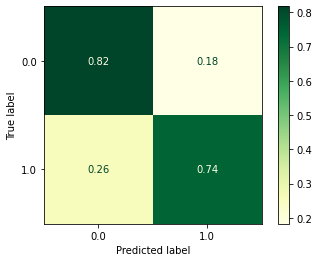

In [9]:
#@title 1. Choose a model and language

Language = 'English'  #@param ["Spanish", "Italian", "Portuguese", "English"]

map_lang_data = {
    'Spanish':
        'spanish',
    'Italian':
        'italian',
    'Portuguese':
        'portuguese',
    'English':
        'english',
}

Emojis_Hashtags = 'All emojis and hashtags'  #@param ["All emojis and hashtags", "No emojis or hashtags"]

map_emojhash_data = {
    'All emojis and hashtags':
        'mantained',
    'No emojis or hashtags':
        'removed',
}

Train_Test_Split = '70/30'  #@param ['60/40', '70/30', '80/20']

map_test_split = {
    '60/40':
        0.4,
    '70/30':
        0.3,
    '80/20':
        0.2,
}

Model = 'SVM RBF kernel standard C'  #@param ["Bernoulli NB", "Multinomial NB", "SVM linear kernel small C", "SVM linear kernel standard C", "SVM linear kernel large C", "SVM RBF kernel small C", "SVM RBF kernel standard C", "SVM RBF kernel large C", "LR liblinear solver small C", "LR liblinear solver standard C","LR liblinear solver large C", "LR lbfgs solver small C", "LR lbfgs solver standard C", "LR lbfgs solver large C"]

TF_IDF = True #@param {type:"boolean"}
Print_model_metrics = True #@param {type:"boolean"}
Balance_data = True #@param {type:"boolean"}

map_vectorizer = {
    True:
        "TfidfVectorizer",
    False:
        "CountVectorizer",
}

map_balanced = {
    True:
        "BALANCED",
    False:
        "NON BALANCED",
}

lang = map_lang_data[Language]
emo_hash = map_emojhash_data[Emojis_Hashtags]
test = map_test_split[Train_Test_Split]
vectorizer = map_vectorizer[TF_IDF]
balanced = map_balanced[Balance_data]

if TF_IDF:
  vectorizer_word = "with"
else:
  vectorizer_word = "without"

print((Language + " data with " + Emojis_Hashtags +" using model " + Model + ", " + vectorizer_word + " TF-IDF and train/test split of " + Train_Test_Split).upper() + ", " + balanced + " DATA")
print("-------------------------------------------------------------------------------------------------------------------------------------------")

if Model == "SVM linear kernel small C":
  chosen_model, vect = support_vector_machine(Balance_data, lang, emo_hash, test, "linear", 0.1, Print_model_metrics, vectorizer)
elif Model == "SVM linear kernel standard C":
  chosen_model, vect = support_vector_machine(Balance_data, lang, emo_hash, test, "linear", 1, Print_model_metrics, vectorizer)
elif Model == "SVM linear kernel large C":
  chosen_model, vect = support_vector_machine(Balance_data, lang, emo_hash, test, "linear", 10, Print_model_metrics, vectorizer)
elif Model == "SVM RBF kernel small C":
  chosen_model, vect = support_vector_machine(Balance_data, lang, emo_hash, test, "rbf", 0.1, Print_model_metrics, vectorizer)
elif Model == "SVM RBF kernel standard C":
  chosen_model, vect = support_vector_machine(Balance_data, lang, emo_hash, test, "rbf", 1, Print_model_metrics, vectorizer)
elif Model == "SVM RBF kernel large C":
  chosen_model, vect = support_vector_machine(Balance_data, lang, emo_hash, test, "rbf", 10, Print_model_metrics, vectorizer)

elif Model == "Bernoulli NB":
  chosen_model, vect = naive_bayes(Balance_data, lang, emo_hash, test, "Bernoulli", Print_model_metrics, vectorizer)
elif Model == "Multinomial NB":
  chosen_model, vect = naive_bayes(Balance_data, lang, emo_hash, test, "Multinomial", Print_model_metrics, vectorizer)

elif Model == "LR liblinear solver small C":
  chosen_model, vect = logistic_regression(Balance_data, lang, emo_hash, test, "liblinear", 0.1, Print_model_metrics, vectorizer)
elif Model == "LR liblinear solver standard C":
  chosen_model, vect = logistic_regression(Balance_data, lang, emo_hash, test, "liblinear", 1, Print_model_metrics, vectorizer)
elif Model == "LR liblinear solver large C":
  chosen_model, vect = logistic_regression(Balance_data, lang, emo_hash, test, "liblinear", 10, Print_model_metrics, vectorizer)
elif Model == "LR lbfgs solver small C":
  chosen_model, vect = logistic_regression(Balance_data, lang, emo_hash, test, "lbfgs", 0.1, Print_model_metrics, vectorizer)
elif Model == "LR lbfgs solver standard C":
  chosen_model, vect = logistic_regression(Balance_data, lang, emo_hash, test, "lbfgs", 1, Print_model_metrics, vectorizer)
elif Model == "LR lbfgs solver large C":
  chosen_model, vect = logistic_regression(Balance_data, lang, emo_hash, test, "lbfgs", 10, Print_model_metrics, vectorizer)

In [7]:
#@title 2. Write some text to see if it contains hate speech...
text = "" #@param {type:"string"}
text = text.encode('utf-16','surrogatepass').decode('utf-16')
#demojize possible emojis
emo_full_list = ''.join(c for c in text if c in emoji.UNICODE_EMOJI['en'])
emo_unique_list = np.unique(list(emo_full_list))
for k in emo_unique_list:
    text = text.replace(k, " " + emoji.demojize(k) + " ")

prediction = chosen_model.predict(vect.transform([text]))

if prediction == 1 or prediction == "hate speech":
  print("YES, This text contains hate speech")
else:
  print("NO, This text does not contain hate speech")

YES, This text contains hate speech
